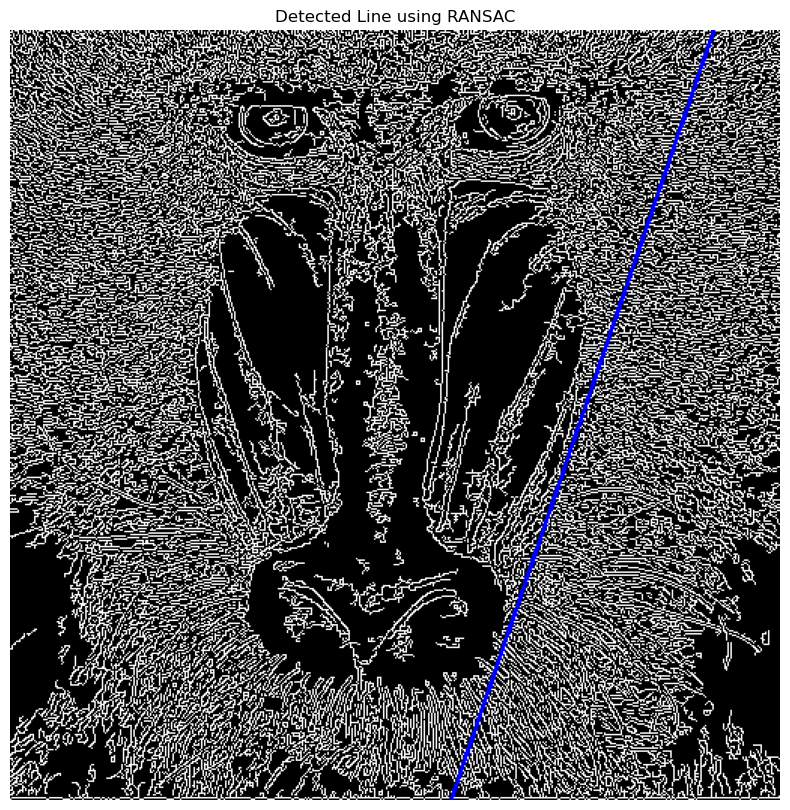

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def ransac_line_detection(edges, num_iterations=1000, threshold=2, min_inliers=50):
    height, width = edges.shape
    best_line = None
    best_inliers = 0

    points = np.column_stack(np.nonzero(edges))

    for _ in range(num_iterations):
        # 랜덤으로 두 점 선택
        if len(points) < 2:
            break
        sample_points = points[np.random.choice(points.shape[0], 2, replace=False)]
        p1, p2 = sample_points

        # 두 점으로 직선 방정식 계산
        if p2[0] == p1[0]:  # 수직선 처리
            continue
        slope = (p2[1] - p1[1]) / (p2[0] - p1[0])
        intercept = p1[1] - slope * p1[0]

        # 인라이어 계산
        inliers = []
        for point in points:
            y, x = point
            distance = abs(slope * x - y + intercept) / np.sqrt(slope**2 + 1)
            if distance < threshold:
                inliers.append(point)

        # 인라이어 집합이 충분히 큰 경우 갱신
        if len(inliers) > best_inliers:
            best_inliers = len(inliers)
            best_line = (slope, intercept)

    return best_line

# 이미지 로드 및 에지 검출
image = cv2.imread('./image/babbon.bmp', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image, 50, 150)

# RANSAC을 사용하여 직선 검출
line = ransac_line_detection(edges)

# 결과 이미지에 직선 그리기
result_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
height, width = edges.shape  # 이미지의 크기 정의

if line is not None:
    slope, intercept = line
    x1 = 0
    y1 = int(intercept)
    x2 = width - 1
    y2 = int(slope * (width - 1) + intercept)
    cv2.line(result_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 결과 출력
plt.figure(figsize=(10, 10))
plt.title("Detected Line using RANSAC")
plt.imshow(result_image)
plt.axis('off')
plt.show()
